## 指定学期课程教师成绩分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os   

#%matplotlib inline
plt.rcdefaults()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['figure.figsize']=[9,9] #改变显示图形的大小

In [2]:
#XNM,XQM,JSGH,JSXM,KCH,KCMC,BFZCJ
file_name='data/xscjb20190215.csv'
fields=['XNM','XQM','JSGH','JSXM','KCH','KCMC','BFZCJ']
df_cjb_js_term=pd.read_csv(file_name,usecols=fields,dtype={'XNM':np.object,'XQM':np.object})

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_cjb_js_term.tail()

,XNM,XQM,BFZCJ,KCH,KCMC,JSGH,JSXM
3813510,2018,3,49.0,A1630018,电力电子技术,200300056,鲁明丽
3813511,2018,3,26.0,A1630018,电力电子技术,200300056,鲁明丽
3813512,2018,3,64.0,A1630018,电力电子技术,200300056,鲁明丽
3813513,2018,3,45.0,A1630018,电力电子技术,200300056,鲁明丽
3813514,2018,3,16.0,A1630018,电力电子技术,200300056,鲁明丽


In [4]:
df_cjb_js_term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813515 entries, 0 to 3813514
Data columns (total 7 columns):
XNM      object
XQM      object
BFZCJ    float64
KCH      object
KCMC     object
JSGH     object
JSXM     object
dtypes: float64(1), object(6)
memory usage: 203.7+ MB


#### 获取指定学期的数据（XNM='2018-2019'  XQM='3'）

In [5]:
df_cjb_sinterm=df_cjb_js_term[(df_cjb_js_term.XNM=='2018') & (df_cjb_js_term.XQM=='3')]   #176923 rows × 7 columns
df_cjb_sinterm.head()

,XNM,XQM,BFZCJ,KCH,KCMC,JSGH,JSXM
3636592,2018,3,60.0,02300083,宏观经济学,NaN,无
3636593,2018,3,86.0,02300083,宏观经济学,NaN,无
3636594,2018,3,60.0,09100101,大学信息技术,NaN,无
3636595,2018,3,60.0,T1000417,大学体育3（男子篮球）,NaN,无
3636596,2018,3,60.0,30300003,入学教育,NaN,无


##### 分析某个教师的课程成绩分布

###### 按教师姓名查询

In [6]:
#### 1、统计每门课程的成绩人数
df_cjb_group=df_cjb_sinterm.groupby(['JSXM','KCMC','BFZCJ']).count()
df_cjb_group.reset_index(inplace=True)
df_cjb_group.head()

,JSXM,KCMC,BFZCJ,XNM,XQM,KCH,JSGH
0,Shakhrukh Madjidov,宏观经济学,78.0,1,1,1,1
1,Shakhrukh Madjidov,宏观经济学,78.5,1,1,1,1
2,Shakhrukh Madjidov,宏观经济学,79.5,1,1,1,1
3,Shakhrukh Madjidov,宏观经济学,81.5,1,1,1,1
4,Shakhrukh Madjidov,宏观经济学,82.0,1,1,1,1


In [9]:
jsxm='高燕'   #教师姓名：沈健/秦志刚/赵根林/高燕/宋东兴/陈希棠/邹永林/周思林/张根华/徐惠钢/殷旭东/钱斌
df_cjb_single=df_cjb_group[df_cjb_group.JSXM==jsxm]
df_cjb_single.head()
df_cjb_single.to_csv('data/gaoyan.csv',index=False)

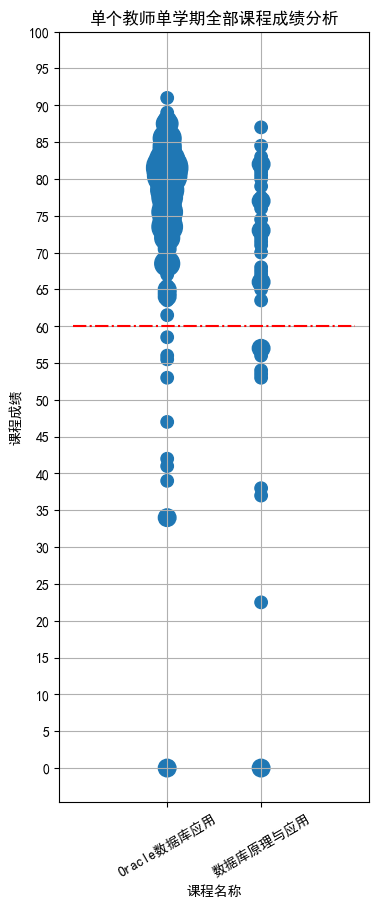

In [130]:

len1=len(df_cjb_single.groupby('KCMC').count())
if (len1==0):
    len1=4

#绘制图像    
point_size=80     #图像点的大小

df_cjb_single.insert(0,'SCALE',df_cjb_single.KCH*point_size)  #按比例显示人数
#df_jscjb_single.eval('KCH=KCH*23',inplace=True)
plt.figure(figsize=[2*len1,10])
plt.grid()

plt.scatter('KCMC','BFZCJ','SCALE',data=df_cjb_single)
plt.plot([-1,len1],[60,60],'r-.')
plt.xticks(rotation=30)
plt.yticks(range(0,101,5))

plt.title("单个教师单学期全部课程成绩分析")
plt.xlabel('课程名称')
plt.ylabel('课程成绩')

pic_file_name='img/'+jsxm+'任课成绩分析.png'
#plt.savefig(pic_file_name)
plt.show()

#### 成绩分析箱图

In [204]:
jsxm='李春红'   #教师姓名：沈健/秦志刚/赵根林/高燕/宋东兴/陈希棠/邹永林/周思林/张根华/徐惠钢/殷旭东/钱斌
#李春红/王蓓蓓
#jsxm='宋东兴'   #出错
df_cjb_single=df_cjb_group[df_cjb_group.JSXM==jsxm]
df_cjb_single.head()
df_cjb_single.tail()


,JSXM,KCMC,BFZCJ,XNM,XQM,KCH,JSGH,JG_ID
27971,李春红,文学概论,93.0,2,2,2,2,2
27972,李春红,文学概论,93.5,2,2,2,2,2
27973,李春红,文学概论,95.0,1,1,1,1,1
27974,李春红,文学概论,95.5,2,2,2,2,2
27975,李春红,文学概论,96.0,1,1,1,1,1


In [205]:
list_labels=df_cjb_single.groupby('KCMC').count().index.tolist()
#print(list_labels)
list_cjb_show=[]
for kcmc in list_labels:
    #print(kcmc)
    array_cjb=df_cjb_single[df_cjb_single.KCMC==kcmc].BFZCJ.to_numpy()
    array_cjb.shape=(-1,1)    
    list_cjb_show.append(array_cjb)


2


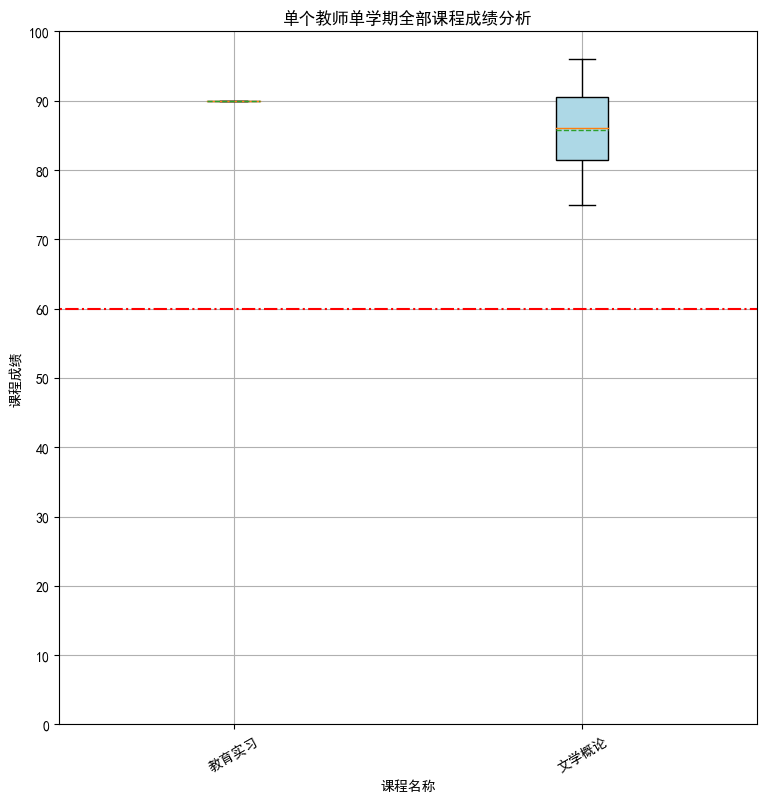

In [206]:
len1=len(list_labels)
print(len1)
red_square = dict(markerfacecolor='r', marker='s')
if len1==0:
    pass
elif len1==1:
    data_show=list_cjb_show[0]
else :
    data_show=list_cjb_show
    
#print(data_show)
#dic_cjb_single=plt.boxplot(data_show)

dic_cjb_single=plt.boxplot(data_show,
                           meanline=True,
                           showmeans=True,#显示平均分线
                           patch_artist=True,  # fill with color
                           labels=list_labels,  # will be used to label x-ticks
                           flierprops=red_square) 
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(dic_cjb_single['boxes'], colors):
    patch.set_facecolor(color) 

plt.grid()
plt.plot([-1,len1+1],[60,60],'r-.')
plt.xticks(rotation=30)
plt.yticks(range(0,101,10))

plt.title("单个教师单学期全部课程成绩分析")
plt.xlabel('课程名称')
plt.ylabel('课程成绩')

pic_file_name='img/'+jsxm+'任课成绩分析.png'
#plt.savefig(pic_file_name)
plt.show()

#### 糖葫芦图+箱图

In [59]:
#### 1、统计每门课程的成绩人数
df_cjb_group=df_cjb_sinterm.groupby(['JSXM','KCMC','BFZCJ']).count()
df_cjb_group.reset_index(inplace=True)
df_cjb_group.head()

,JSXM,KCMC,BFZCJ,XNM,XQM,KCH,JSGH
0,Shakhrukh Madjidov,宏观经济学,78.0,1,1,1,1
1,Shakhrukh Madjidov,宏观经济学,78.5,1,1,1,1
2,Shakhrukh Madjidov,宏观经济学,79.5,1,1,1,1
3,Shakhrukh Madjidov,宏观经济学,81.5,1,1,1,1
4,Shakhrukh Madjidov,宏观经济学,82.0,1,1,1,1


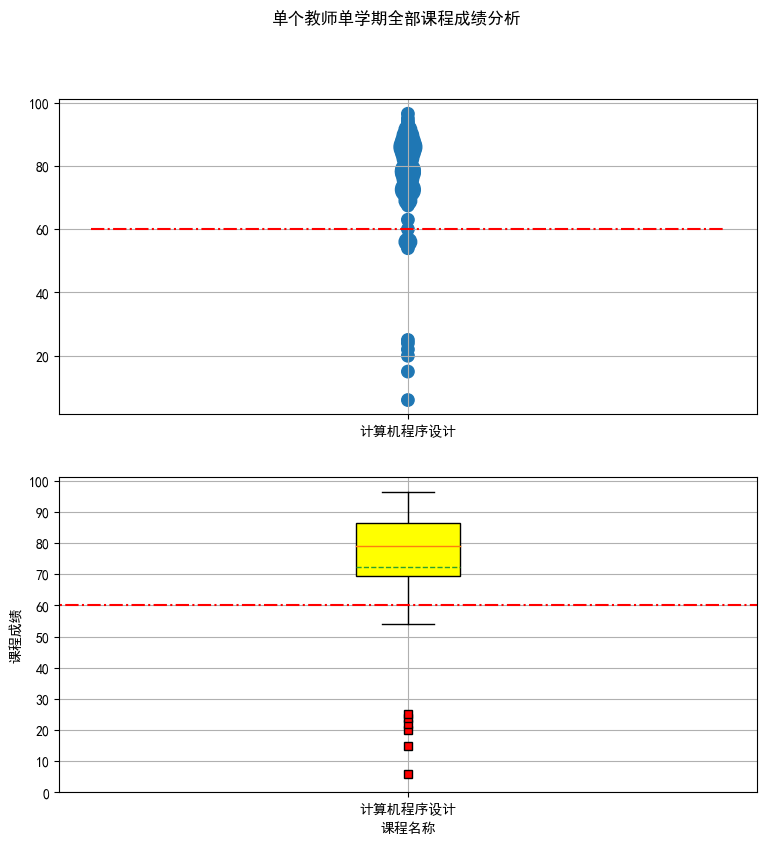

In [74]:
jsxm='宋东兴'   #教师姓名：沈健/秦志刚/赵根林/高燕/宋东兴/陈希棠/邹永林/周思林/张根华/徐惠钢/殷旭东/钱斌
df_cjb_single=df_cjb_group[df_cjb_group.JSXM==jsxm]
len1=len(df_cjb_single.groupby('KCMC').count())
#if (len1==0):
#    len1=4

fig,(ax1,ax2)=plt.subplots(2,1)
fig.suptitle("单个教师单学期全部课程成绩分析")
#绘制糖葫芦图
point_size=80     #图像点的大小
df_cjb_single.insert(0,'SCALE',df_cjb_single.KCH*point_size)  #增加按比例显示人数的列

#plt.figure(figsize=[2*len1,10])
ax1.grid()

ax1.scatter('KCMC','BFZCJ','SCALE',data=df_cjb_single)
ax1.plot([-1,len1],[60,60],'r-.')
#plt.xticks(rotation=30)
plt.yticks(range(0,101,5))

#ax1.set_title("单个教师单学期全部课程成绩分析")
plt.xlabel('课程名称')
plt.ylabel('课程成绩')
#--------------------------------
list_labels=df_cjb_single.groupby('KCMC').count().index.tolist()   #获取课程名称
#生成箱图数据
list_cjb_show=[]
for kcmc in list_labels:
    #print(kcmc)
    array_cjb=np.array([df_cjb_single[df_cjb_single.KCMC==kcmc].BFZCJ])
    array_cjb.shape=(-1,1)    
    list_cjb_show.append(array_cjb)

ax2.grid()
red_square = dict(markerfacecolor='r', marker='s')
if len1==0:
    pass
elif len1==1:
    show_data=list_cjb_show[0]
else :
    show_data=list_cjb_show
    
dic_cjb_single=ax2.boxplot(show_data,
                           meanline=True,
                           showmeans=True,#显示平均分线
                           patch_artist=True,  # fill with color
                           labels=list_labels,  # will be used to label x-ticks
                           flierprops=red_square) 
 # fill with colors
colors = ['yellow','pink', 'lightblue', 'lightgreen','lightyellow']
for patch, color in zip(dic_cjb_single['boxes'], colors):
    patch.set_facecolor(color)    

ax2.plot([-1,len1+1],[60,60],'r-.')
#plt.xticks(rotation=30)
plt.yticks(range(0,101,10))

#ax2.set_title("单个教师单学期全部课程成绩分析")
plt.xlabel('课程名称')
plt.ylabel('课程成绩')

pic_file_name='img/'+jsxm+'任课成绩分析.png'
#plt.savefig(pic_file_name)
plt.show() 

   



###### 按教师工号查询

In [55]:
#### 1、统计每门课程的成绩人数
df_cjb_group=df_cjb_sinterm.groupby(['JSGH','KCMC','BFZCJ']).count()
df_cjb_group.reset_index(inplace=True)
df_cjb_group.head()

,JSGH,KCMC,BFZCJ,XNM,XQM,KCH,JSXM
0,199000005,管理学,0.0,1,1,1,1
1,199000005,管理学,65.5,1,1,1,1
2,199000005,管理学,75.5,1,1,1,1
3,199000005,管理学,76.0,3,3,3,3
4,199000005,管理学,76.5,2,2,2,2


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


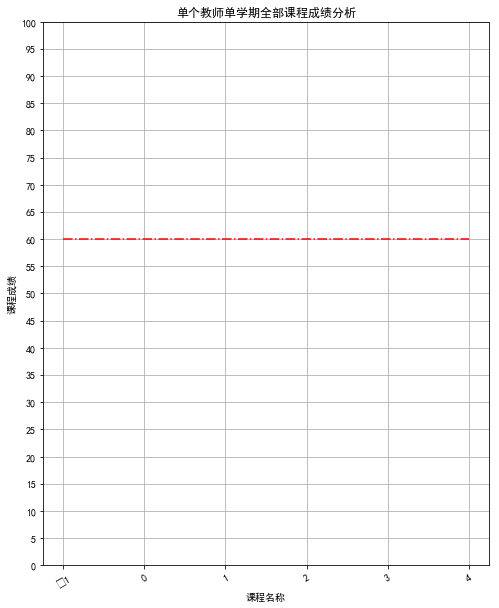

In [14]:
jsgh='201600011'   #教师姓名：沈健/秦志刚/赵根林/高燕/宋东兴/陈希棠/邹永林/周思林/张根华/徐惠钢/殷旭东/钱斌
df_cjb_single=df_cjb_group[df_cjb_group.JSGH==jsgh]
df_cjb_single.head()

len1=len(df_cjb_single.groupby('KCMC').count())
if (len1==0):
    len1=4

#绘制图像    
point_size=80     #图像点的大小

df_cjb_single.insert(0,'SCALE',df_cjb_single.KCH*point_size)  #按比例显示人数
#df_jscjb_single.eval('KCH=KCH*23',inplace=True)
plt.figure(figsize=[2*len1,10])
plt.grid()

plt.scatter('KCMC','BFZCJ','SCALE',data=df_cjb_single)
plt.plot([-1,len1],[60,60],'r-.')
plt.xticks(rotation=30)
plt.yticks(range(0,101,5))

plt.title("单个教师单学期全部课程成绩分析")
plt.xlabel('课程名称')
plt.ylabel('课程成绩')

pic_file_name='img/'+jsxm+'任课成绩分析.png'
#plt.savefig(pic_file_name)
plt.show()

### 按教师所在学院统一导出教师个人的指定单学期成绩分析

###### 1.载入教师基本信息表

In [208]:
file_name_js='data/jsjbxxb20190214.csv'
df_teacher=pd.read_csv(file_name_js,usecols=['JGH','JG_ID'])

In [209]:
df_teacher.head()

,JGH,JG_ID
0,200800006,02
1,200800044,99
2,200800047,04
3,200800049,99
4,200800090,01


In [210]:
df_teacher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 2 columns):
JGH      3132 non-null object
JG_ID    2787 non-null object
dtypes: object(2)
memory usage: 49.0+ KB


In [211]:
df_cjb_sinterm.head()

,XNM,XQM,BFZCJ,KCH,KCMC,JSGH,JSXM,JG_ID
3636592,2018,3,60.0,02300083,宏观经济学,NaN,无,NaN
3636593,2018,3,86.0,02300083,宏观经济学,NaN,无,NaN
3636594,2018,3,60.0,09100101,大学信息技术,NaN,无,NaN
3636595,2018,3,60.0,T1000417,大学体育3（男子篮球）,NaN,无,NaN
3636596,2018,3,60.0,30300003,入学教育,NaN,无,NaN


###### 2.在成绩库中加入教师部门代码

In [212]:
df_cjb_sinterm=df_cjb_sinterm.join(df_teacher.set_index('JGH'),on='JSGH')
df_cjb_sinterm.head()

ValueError: columns overlap but no suffix specified: Index(['JG_ID'], dtype='object')

###### 3.统计每门课程的成绩人数


#### 糖葫芦图
速度很快

In [177]:
#获取部门代码
set_jgid=df_cjb_sinterm.JG_ID.drop_duplicates(keep='first')
for jg_id in set_jgid:
    #print(jg_id)
    #jg_id='01'
    #建立部门代码目录
    path_name='img/'+str(jg_id)
    isExists=os.path.exists(path_name)
    if not isExists:
        os.mkdir(path_name)

    ser_js_jgid=df_teacher[df_teacher.JG_ID==jg_id].JGH
    ser_js_jgid.head()

    df_cjb_group=df_cjb_sinterm.groupby(['JSGH','KCMC','BFZCJ']).count()
    df_cjb_group.reset_index(inplace=True)
    df_cjb_group.head()

    for index in ser_js_jgid.index:
        jsgh=ser_js_jgid[index]
        print(jsgh)

        df_cjb_single=df_cjb_group[df_cjb_group.JSGH==jsgh]
        #没有课程的教师不绘制图像
        len1=len(df_cjb_single.groupby('KCMC').count())    
        if (len1 !=0):
            #绘制图像    
            point_size=80     #图像点的大小
            df_cjb_single.insert(0,'SCALE',df_cjb_single.KCH*point_size)  #按比例显示人数
            #df_jscjb_single.eval('KCH=KCH*23',inplace=True)
            plt.figure(figsize=[2*len1,10])
            plt.grid()

            plt.scatter('KCMC','BFZCJ','SCALE',data=df_cjb_single)
            plt.plot([-1,len1],[60,60],'r-.')
            plt.xticks(rotation=30)
            plt.yticks(range(0,101,5))

            plt.title("单个教师单学期全部课程成绩分析")
            plt.xlabel('课程名称')
            plt.ylabel('课程成绩')

            pic_file_name='img/'+jg_id+'/'+jsgh+'任课成绩分析.png'
            plt.savefig(pic_file_name)
            plt.close()     #否则打开的图形太多
            #plt.show()

print('ok')

AttributeError: 'DataFrame' object has no attribute 'JG_ID'

#### 糖葫芦图+箱图

200800090
和声学基础（一）
小型乐队编配
曲式与作品分析
计算机音乐（一）
200600006
教师职业道德规范与教育法规
教育实习
班级管理与班主任工作
200900011
中国文化概论
中国现代文学名家名作
中国现当代文学（2）
学术经典与论文写作
200700033
学前儿童游戏
学前教育学
200500030
200500031
儿童歌曲弹唱（1）
学前钢琴基础


ValueError: X must have 2 or fewer dimensions

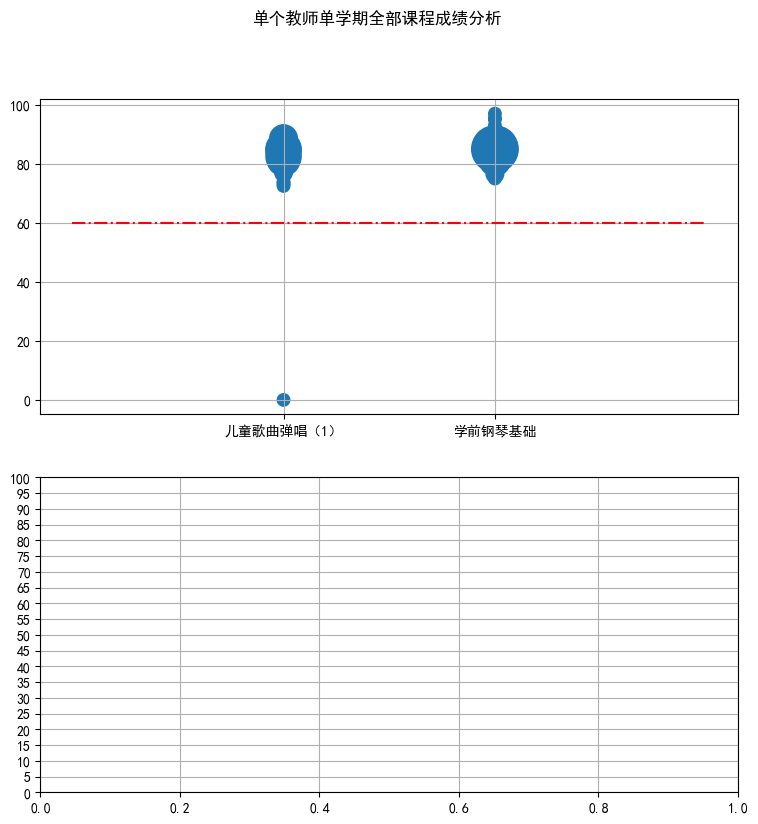

In [215]:
#获取部门代码
set_jgid=df_cjb_sinterm.JG_ID.drop_duplicates(keep='first')
for jg_id in set_jgid:
    #建立部门代码目录
    path_name='img/thlt_xt/'+str(jg_id)
    isExists=os.path.exists(path_name)
    if not isExists:
        os.mkdir(path_name)

    ser_js_jgid=df_teacher[df_teacher.JG_ID==jg_id].JGH
    df_cjb_group=df_cjb_sinterm.groupby(['JSGH','KCMC','BFZCJ']).count()
    df_cjb_group.reset_index(inplace=True)

    for index in ser_js_jgid.index:
        jsgh=ser_js_jgid[index]
        print(jsgh)

        if jsgh=='31':
            pass
        else :
            df_cjb_single=df_cjb_group[df_cjb_group.JSGH==jsgh]
            #没有课程的教师不绘制图像
            len1=len(df_cjb_single.groupby('KCMC').count())    
            if (len1 !=0):
                fig,(ax1,ax2)=plt.subplots(2,1)
                fig.suptitle("单个教师单学期全部课程成绩分析")
                #---------绘制糖葫芦图---------
                point_size=80     #图像点的大小
                df_cjb_single.insert(0,'SCALE',df_cjb_single.KCH*point_size)  #增加按比例显示人数的列
                #plt.xticks(rotation=30)
                plt.yticks(range(0,101,5))
                ax1.grid()
                ax1.scatter('KCMC','BFZCJ','SCALE',data=df_cjb_single)
                ax1.plot([-1,len1],[60,60],'r-.')


                #---------生成箱图数据-----------------------
                list_labels=df_cjb_single.groupby('KCMC').count().index.tolist()   #获取课程名称
                list_cjb_show=[]
                for kcmc in list_labels:
                    print(kcmc)
                    #array_cjb=np.array([df_cjb_single[df_cjb_single.KCMC==kcmc].BFZCJ])
                    array_cjb=df_cjb_single[df_cjb_single.KCMC==kcmc].BFZCJ.to_numpy()
                    array_cjb.shape=(-1,1)    
                    list_cjb_show.append(array_cjb)

                ax2.grid()
                red_square = dict(markerfacecolor='r', marker='s')
                if len1==1:
                    show_data=list_cjb_show[0]
                else :
                    show_data=list_cjb_show

                dic_cjb_single=ax2.boxplot(show_data,
                                           meanline=True,
                                           showmeans=True,#显示平均分线
                                           patch_artist=True,  # fill with color
                                           labels=list_labels,  # will be used to label x-ticks
                                           flierprops=red_square) 
                 # fill with colors
                colors = ['yellow','pink', 'lightblue', 'lightgreen','lightyellow']
                for patch, color in zip(dic_cjb_single['boxes'], colors):
                    patch.set_facecolor(color)    

                ax2.plot([-1,len1+1],[60,60],'r-.')
                #plt.xticks(rotation=30)
                plt.yticks(range(0,101,10))
                plt.xlabel('课程名称')
                plt.ylabel('课程成绩')

                pic_file_name='img/thlt_xt/'+jg_id+'/'+jsgh+'任课成绩分析.png'
                plt.savefig(pic_file_name)
                plt.close()     #否则打开的图形太多
                #plt.show()

print('ok')

In [185]:
'''
#获取部门代码
set_jgid=df_cjb_sinterm.JG_ID.drop_duplicates(keep='first')
for jg_id in set_jgid:
    #建立部门代码目录
    path_name='img/thlt_xt/'+str(jg_id)
    isExists=os.path.exists(path_name)
    if not isExists:
        os.mkdir(path_name)

    ser_js_jgid=df_teacher[df_teacher.JG_ID==jg_id].JGH
    df_cjb_group=df_cjb_sinterm.groupby(['JSGH','KCMC','BFZCJ']).count()
    df_cjb_group.reset_index(inplace=True)

    for index in ser_js_jgid.index:
        jsgh=ser_js_jgid[index]
        print(jsgh)

        df_cjb_single=df_cjb_group[df_cjb_group.JSGH==jsgh]
        #没有课程的教师不绘制图像
        len1=len(df_cjb_single.groupby('KCMC').count())    
        if (len1 !=0):
            fig,(ax1,ax2)=plt.subplots(2,1)
            fig.suptitle("单个教师单学期全部课程成绩分析")
            #---------绘制糖葫芦图---------
            point_size=80     #图像点的大小
            df_cjb_single.insert(0,'SCALE',df_cjb_single.KCH*point_size)  #增加按比例显示人数的列
            #plt.xticks(rotation=30)
            plt.yticks(range(0,101,5))
            ax1.grid()
            ax1.scatter('KCMC','BFZCJ','SCALE',data=df_cjb_single)
            ax1.plot([-1,len1],[60,60],'r-.')


            #---------生成箱图数据-----------------------
            list_labels=df_cjb_single.groupby('KCMC').count().index.tolist()   #获取课程名称
            list_cjb_show=[]
            for kcmc in list_labels:
                #print(kcmc)
                array_cjb=np.array([df_cjb_single[df_cjb_single.KCMC==kcmc].BFZCJ])
                array_cjb.shape=(-1,1)    
                list_cjb_show.append(array_cjb)

            ax2.grid()
            red_square = dict(markerfacecolor='r', marker='s')
            if len1==1:
                show_data=list_cjb_show[0]
            else :
                show_data=list_cjb_show

            dic_cjb_single=ax2.boxplot(show_data,
                                       meanline=True,
                                       showmeans=True,#显示平均分线
                                       patch_artist=True,  # fill with color
                                       labels=list_labels,  # will be used to label x-ticks
                                       flierprops=red_square) 
             # fill with colors
            colors = ['yellow','pink', 'lightblue', 'lightgreen','lightyellow']
            for patch, color in zip(dic_cjb_single['boxes'], colors):
                patch.set_facecolor(color)    

            ax2.plot([-1,len1+1],[60,60],'r-.')
            #plt.xticks(rotation=30)
            plt.yticks(range(0,101,10))
            plt.xlabel('课程名称')
            plt.ylabel('课程成绩')

            pic_file_name='img/thlt_xt/'+jg_id+'/'+jsgh+'任课成绩分析.png'
            plt.savefig(pic_file_name)
            plt.close()     #否则打开的图形太多
            #plt.show()

print('ok')
'''


'\n#获取部门代码\nset_jgid=df_cjb_sinterm.JG_ID.drop_duplicates(keep=\'first\')\nfor jg_id in set_jgid:\n    #建立部门代码目录\n    path_name=\'img/thlt_xt/\'+str(jg_id)\n    isExists=os.path.exists(path_name)\n    if not isExists:\n        os.mkdir(path_name)\n\n    ser_js_jgid=df_teacher[df_teacher.JG_ID==jg_id].JGH\n    df_cjb_group=df_cjb_sinterm.groupby([\'JSGH\',\'KCMC\',\'BFZCJ\']).count()\n    df_cjb_group.reset_index(inplace=True)\n\n    for index in ser_js_jgid.index:\n        jsgh=ser_js_jgid[index]\n        print(jsgh)\n\n        df_cjb_single=df_cjb_group[df_cjb_group.JSGH==jsgh]\n        #没有课程的教师不绘制图像\n        len1=len(df_cjb_single.groupby(\'KCMC\').count())    \n        if (len1 !=0):\n            fig,(ax1,ax2)=plt.subplots(2,1)\n            fig.suptitle("单个教师单学期全部课程成绩分析")\n            #---------绘制糖葫芦图---------\n            point_size=80     #图像点的大小\n            df_cjb_single.insert(0,\'SCALE\',df_cjb_single.KCH*point_size)  #增加按比例显示人数的列\n            #plt.xticks(rotation=30)\n       

#### end